In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Набор данных взят с https://www.kaggle.com/aungpyaeap/fish-market
# Параметры нескольких популярных промысловых рыб
# length 1 = Body height
# length 2 = Total Length
# length 3 = Diagonal Length
fish_data = pd.read_csv("datasets/Fish.csv", delimiter=',')
print(fish_data)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [7]:
# Выделим необходимые переменные
x_labels = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
y_label = 'Weight'
data = fish_data[x_labels + [y_label]]
print(data)

     Length1  Length2  Length3   Height   Width  Weight
0       23.2     25.4     30.0  11.5200  4.0200   242.0
1       24.0     26.3     31.2  12.4800  4.3056   290.0
2       23.9     26.5     31.1  12.3778  4.6961   340.0
3       26.3     29.0     33.5  12.7300  4.4555   363.0
4       26.5     29.0     34.0  12.4440  5.1340   430.0
..       ...      ...      ...      ...     ...     ...
154     11.5     12.2     13.4   2.0904  1.3936    12.2
155     11.7     12.4     13.5   2.4300  1.2690    13.4
156     12.1     13.0     13.8   2.2770  1.2558    12.2
157     13.2     14.3     15.2   2.8728  2.0672    19.7
158     13.8     15.0     16.2   2.9322  1.8792    19.9

[159 rows x 6 columns]


In [8]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(data))
print(val_test_size)

32


In [9]:
# Генерируем уникальный seed
my_code = "Johnson"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [19]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [20]:
# Преобразуем данные к ожидаемому библиотекой skleran формату
#train_x = np.array(train[x_labels]).reshape(-1,1)
train_x = train[x_labels]
train_y = np.array(train[y_label]).reshape(-1,1)

#val_x = np.array(val[x_labels]).reshape(-1,1)
val_x = val[x_labels]
val_y = np.array(val[y_label]).reshape(-1,1)

#test_x = np.array(test[x_labels]).reshape(-1,1)
test_x = test[x_labels]
test_y = np.array(test[y_label]).reshape(-1,1)

In [30]:
print(train_x)
for x in train_x :
    print(x)

     Length1  Length2  Length3   Height   Width
18      30.9     33.5     38.6  15.6330  5.1338
134     40.0     42.5     45.5   7.2800  4.3225
128     30.0     32.3     34.8   5.5680  3.3756
98      22.6     24.6     26.2   6.7334  4.1658
60      37.3     40.0     43.5  12.3540  6.5250
..       ...      ...      ...      ...     ...
158     13.8     15.0     16.2   2.9322  1.8792
84      19.0     21.0     22.5   5.6925  3.6675
46      21.0     22.5     25.0   6.5500  3.3250
154     11.5     12.2     13.4   2.0904  1.3936
66      19.0     20.7     23.2   8.5376  3.2944

[95 rows x 5 columns]
Length1
Length2
Length3
Height
Width


In [ ]:
# Нормируем значения
scalers = []
scaled_train_x = []
for x in train_x :
    scaler_x = MinMaxScaler()
    scaler_x.fit(x)
    scaled_x = scaler_x.transform(x)
    scalers.add(scaler_x)
    scaled_train_x.add[scaled_x]

scaler_y = MinMaxScaler()
scaler_y.fit(train_y)
scaled_train_y = scaler_y.transform(train_y)

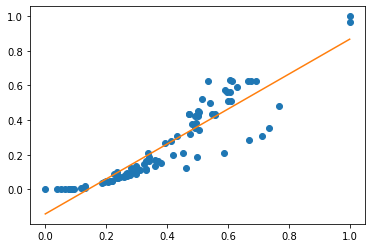

In [14]:
# Строим модель и выводим результаты для нормированных данных
model2 = linear_model.LinearRegression()
model2.fit(scaled_train_x, scaled_train_y)
a = model2.coef_[0]
b = model2.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [15]:
# Проверим результат на валидационной выборке
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model2.predict(scaled_val_x)

mse2 = mean_squared_error(scaled_val_y, val_predicted)
print(mse2)

0.008373125246063868


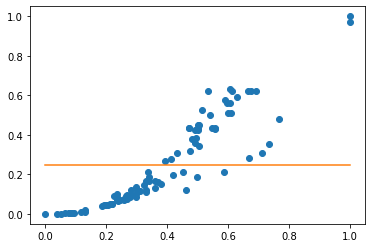

In [16]:
# Построим модель линейной регресси с L1-регуляризацией и выведем результаты для нормированных данных
model3 = linear_model.Lasso()
model3.fit(scaled_train_x, scaled_train_y)
a = model3.coef_[0]
b = model3.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [17]:
# Проверим результат на валидационной выборке
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model3.predict(scaled_val_x)

mse3 = mean_squared_error(scaled_val_y, val_predicted)
print(mse3)

0.055926483371156764


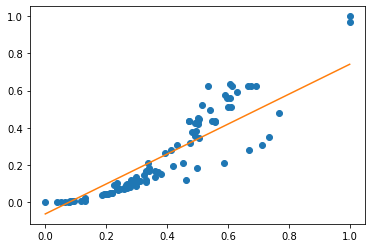

In [18]:
# Построим модель линейной регресси с L2-регуляризацией и выведем результаты для нормированных данных
model4 = linear_model.Ridge()
model4.fit(scaled_train_x, scaled_train_y)
a = model4.coef_[0]
b = model4.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [19]:
# Проверим результат на валидационной выборке
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model4.predict(scaled_val_x)

mse4 = mean_squared_error(scaled_val_y, val_predicted)
print(mse4)

0.009317697850441578


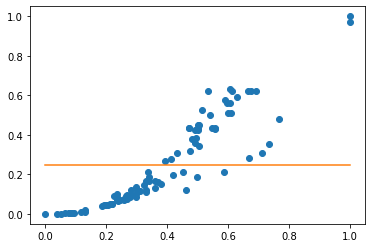

In [20]:
# Построим модель линейной регресси с ElasticNet-регуляризацией и выведем результаты для нормированных данных
model5 = linear_model.ElasticNet()
model5.fit(scaled_train_x, scaled_train_y)
a = model5.coef_[0]
b = model5.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [21]:
# Проверим результат на валидационной выборке
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model5.predict(scaled_val_x)

mse5 = mean_squared_error(scaled_val_y, val_predicted)
print(mse5)

0.055926483371156764


In [22]:
# Выведем ошибки для моделей на нормированных данных
print(mse2, mse3, mse4, mse5)

0.008373125246063868 0.055926483371156764 0.009317697850441578 0.055926483371156764


In [23]:
# Минимальное значение достигается для второй модели, получим итоговую величину ошибки на тестовой выборке
scaled_test_x = scaler_x.transform(test_x)
scaled_test_y = scaler_y.transform(test_y)

test_predicted = model2.predict(scaled_test_x)

mse_test = mean_squared_error(scaled_test_y, test_predicted)
print(mse_test)

0.007290890601151484


In [24]:
# Повторите выделение данных, нормирование, и анализ 4 моделей
# (обычная линейная регрессия, L1-регуляризация, L2-регуляризация, ElasticNet-регуляризация)
# для x = Length2 и y = Width.